# ARIMA

Autoregressive Integrated Moving Average

- ARIMA(p,d,q)
   - p is the order of the autoregressive model 
   - d is the degree of differencing 
   - q is the order of the moving average model 

ARIMA is definde as teh sum of the AR(p) and MA(q) models with a degree of differencing d. 

# AR vs MA Models 
- AR: A regression modle that utilizes the dependent relationship between a current observation and observations over a previous period. 
- MA: A model that uses the dependency between an observation and a residual error from a  moving average model applied to lagged observations.

AR and MA models are both components of the ARIMA modle, but they havae different characteristics adn uses. 

AR (Autoregressive) modles use past values of the time series to prdict futere values. The order of the AR modle, denoted by p, specifies the number of past values ot use in the prediction. An AR model of order p cvna be written as: 

y_t = c + phi_1 * y_{t-1} + phi_2 * y_{t-2} + ... + phi_p * y_{t-p} + e_t

where y_t is the value fo the time series at time t, c is a constant, e_t is the eroor term at tiem t, and  theta_1 to theta_q are the coefficients of the past error terms. 

In summary, AR models use past values fo the time series to predict future values, while MA models use past error terms to predict futerue values. Both AR and MA modles can be combined in the ARIMA modle to capture the autocorrelation and seasonality of the time series. 



c:\Users\Saurabh Kumar\miniconda3\envs\tf_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


144    439.855344
145    465.297276
146    500.666674
147    535.971564
148    561.688584
149    571.311503
150    562.970543
151    539.727529
152    508.527028
153    478.147167
Name: predicted_mean, dtype: float64


<Axes: >

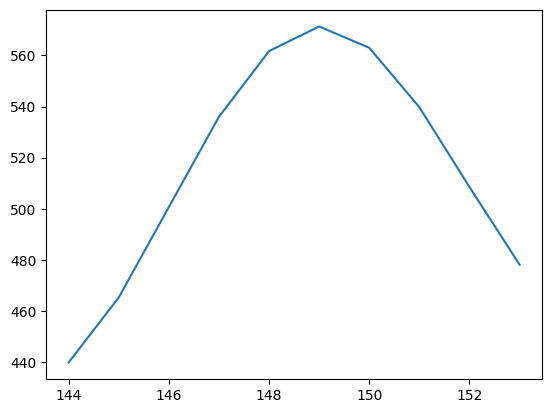

In [6]:
import pandas as pd 
from statsmodels.tsa.arima.model import ARIMA 

# Load a sample dataset. We'll use "airPassengers" dataset. 
df=pd.read_csv('../Data/Airpassengers.csv')

# We'll use the "Passengers" column to train our ARIMA model. 
# For this example, we'll use an ARIMA(2, 1, 2) model.

modle = ARIMA(df['#Passengers'], order=(2,1,2))

# Fit the model 
model = modle.fit()

# Make a prediction 
prediction = model.forecast (steps=10)

print(prediction)

# plot the prediction
prediction.plot()

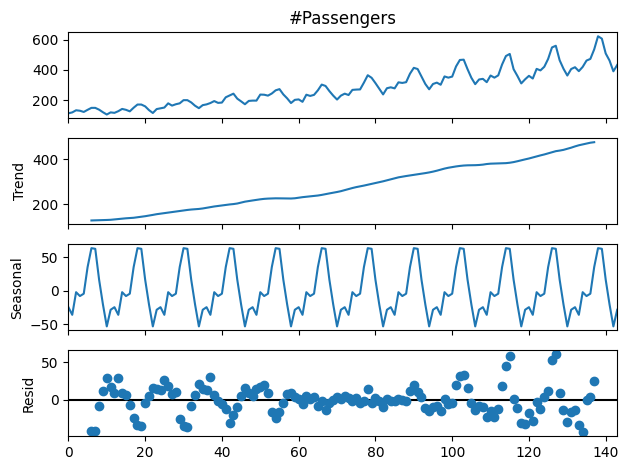

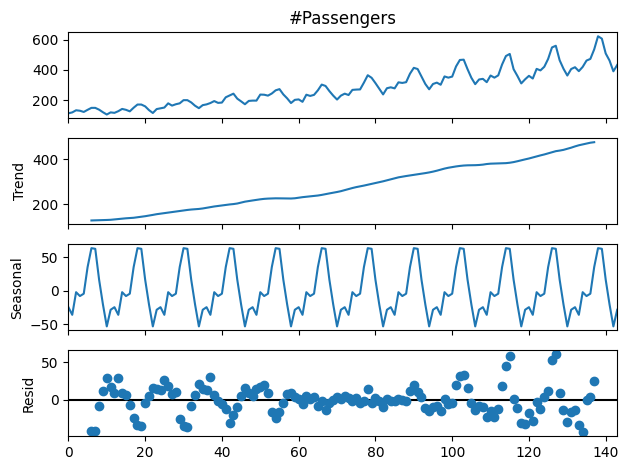

In [12]:
# decompose the tiem series into trend, seasonal and residual components 

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['#Passengers'], model='additive', period=12)

decomposition.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller 
from numpy import log 


result = adfuller(df['#Passengers'].dropna())


print("ADF Statistic: %f" % result[0])
print('p-value: %f'% result[1])
print('Is data Stationary?', result[1]<0.05)

ADF Statistic: 0.815369
p-value: 0.991880
Is data Stationary? False


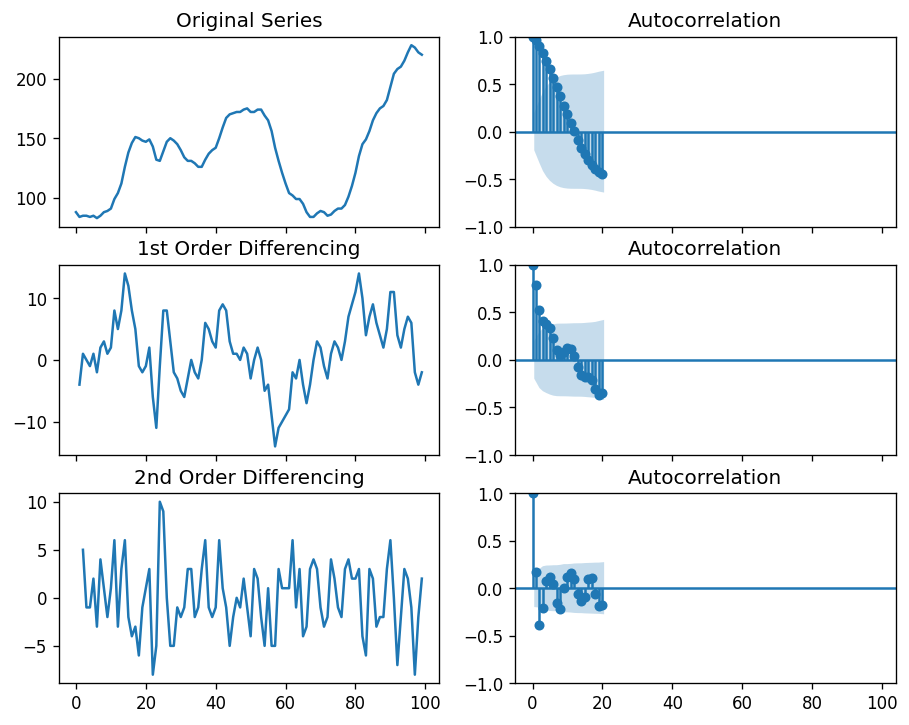

In [15]:
import numpy as np, pandas as pd 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

import matplotlib.pyplot as plt 
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})



# import data 
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)


# Original Series 
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0,0].plot(df.value); axes[0,0].set_title('Original Series')
plot_acf(df.value, ax=axes[0,1])


# 1st Differencing 

axes[1,0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1,1])

# 2nd Differencing 
axes[2, 0].plot(df.value.diff().diff()); axes[2,0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2,1])

plt.show()

In [18]:
# !pip install pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   --- ----------------------------------- 61.4/614.7 kB 365.7 kB/s eta 0:00:02
   --- ----------------------------------- 61.4/614.7 kB 365.7 kB/s eta 0:00:02
   ---------- --------------------------- 174.1/614.7 kB 751.6 kB/s eta 0:00:01
   ------------ ------------------------- 194.6/614.7 kB 695.5 kB/s eta 0:00:01
   ----------------- -------------------- 286.7/614.7 kB 886.2 kB/s eta 0:00:01
   ----------------- -------------------- 286.7/614.7 kB 886.2 kB/s eta 0:00:01
   -------------------- ----------------- 337.9/614.7 kB 807.1 kB/s eta 0:00:01
   ---------------------- --------------- 368.6/614.7 kB 765.8 kB/s eta 0:00:01
   ----------------------------- -------- 481.3/614.7 kB 914.6 kB/s eta 0

In [19]:
from pmdarima.arima.utils import ndiffs 

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

y=df.value

# Adf Test 
ndiffs(y, test='adf')

# KPSS test 
ndiffs(y, test='kpss')

# pp test 
ndiffs(y, test='pp')

2

# Introduction to ARIMA Model

ARIMA (AutoRegressive Integrated Moving Average) is a popular time series forecasting model that is used to predict future values based on past observations. It is a combination of three components: AutoRegression (AR), Integration (I), and Moving Average (MA).

ARIMA models are widely used in various fields such as finance, economics, engineering, and science to forecast future values of a time series. In this notebook, we will learn how to implement ARIMA model in Python using the `pmdarima` library.

# Installing Required Libraries

Before we start, we need to install the required libraries. We will be using `pandas`, `numpy`, `matplotlib`, and `pmdarima` libraries in this notebook. You can install them using the following command:



In [20]:
# !pip install pandas numpy matplotlib pmdarima



# Importing Required Libraries

Once the libraries are installed, we can import them in our notebook using the following code:



In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from pmdarima.arima.utils import ndiffs 
from pmdarima.arima import auto_arima 

# Loading Data 
For this notebook, we will be using the `WWW.usage.csv` dataset, which contains the number fo users accessing a website over time. We can load the data suing the following code;

In [22]:
df=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
y = df.value 
df.head()

,value
0,88
1,84
2,85
3,85
4,84


# Stationarity Test 

Before we can apply ARIMA  model to our data, we need to check if the data is stationary or nto . Stationarity is an importat assumption of ARIMA model,
Which means that the statistical properties of the time series remain constatn over time.


We can check the stationarity of our data using the Augmentd Dickey-Fuller(ADF) test, KPSS test, and Phillips-Perron(PP) TEST. Teh ndiffs function from pmdarima libarry cna be used to determine the number of differences required to make the data stationary. 



In [23]:
# Adf Test 
ndiffs(y, test='adf')

# KPSS test 
ndiffs(y, test='kpss')

# PP test
ndiffs(y, test='pp')

2

The output of the above code indicates that we nedd to tkake two differeces to make the data statonary accrodign to ADF and PP tests, and no differeces is required accoridning to KPSS test. 

# Auto ARIMA Model 
Once we have dterminded the number of differences required to amek the data stationary, we can apply the ARIMA modle to our data. The `auto_arima` function from `pmdarima` library can be used to automatically select the best ARIMA model based on the AIC(Akaike Information Criterion) value.

In [24]:
model = auto_arima(y, start_p=0, start_q=0,
                   max_p=5, max_q=5, m=12,
                   start_P=0, seasonal=True,
                   d=2, D=1, trace=True,
                   error_action='ignore',
                   suporess_warnings=True,
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=496.268, Time=0.12 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=515.970, Time=0.03 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=513.581, Time=0.10 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=488.108, Time=0.11 sec
 ARIMA(0,2,1)(0,1,0)[12]             : AIC=510.539, Time=0.03 sec
 ARIMA(0,2,1)(1,1,1)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(0,2,1)(0,1,2)[12]             : AIC=inf, Time=0.90 sec
 ARIMA(0,2,1)(1,1,0)[12]             : AIC=506.329, Time=0.08 sec
 ARIMA(0,2,1)(1,1,2)[12]             : AIC=inf, Time=1.20 sec
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=487.851, Time=0.18 sec
 ARIMA(1,2,1)(0,1,0)[12]             : AIC=509.857, Time=0.04 sec
 ARIMA(1,2,1)(1,1,1)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(1,2,1)(0,1,2)[12]             : AIC=inf, Time=0.82 sec
 ARIMA(1,2,1)(1,1,0)[12]             : AIC=505.849, Time=0.11 sec
 ARIMA(1,2,1)(1,1,2)[12]             : AIC=inf, Time=

The above code fits an ARIMA model to our data using the `auto_arima` function. The `start_p`, `start_q`, `max_p`, and `max_q` parametes difine the range of AR and MA terms to condiser.

The m parameter defines the number of observations per season. The start_P parameter defines the range fo seasonal AR terms of consider. The `d` and `D` paramtes define the number of non-seasonal and seasonal differences, respecitvely. The `trace` prameter prints the progress of the model fitting process. The `error_action` paramter defines the action ot take if an error occurws during the model fitting process. The `suppress_warnings` parameter suppresses the warnings during the model fitting process. 
the `stepwise` prameter performs a stepwise search for the best model. 



# Model Summary 
Once the mdole is fitted, we can print eht esummary of the model using  the suma;ry methso. 

In [26]:
print(model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  100
Model:             SARIMAX(2, 2, 0)x(0, 1, [1], 12)   Log Likelihood                -234.012
Date:                              Mon, 26 Feb 2024   AIC                            476.025
Time:                                      15:02:15   BIC                            485.842
Sample:                                           0   HQIC                           479.976
                                              - 100                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2603      0.103      2.537      0.011       0.059       0.461
ar.L2         -0.47

The output of the above code will disply the summary of the ARIMA MODEL, which incluldes the coefficients, standard errors, t-values, and p-values of the model


# Forecasting 
Once the model is fitrted, we can use it to forecast futier values of the time series. The `predict` method can be used to generarte the forecasts.

In [27]:
forecast = model.predict(n_periods=12)

The above code generates 12 fetaure values of the time series 


# Plotting Results 

Finally, we can plot the original time series, the fitted values, and the forecasts uisng the following code:

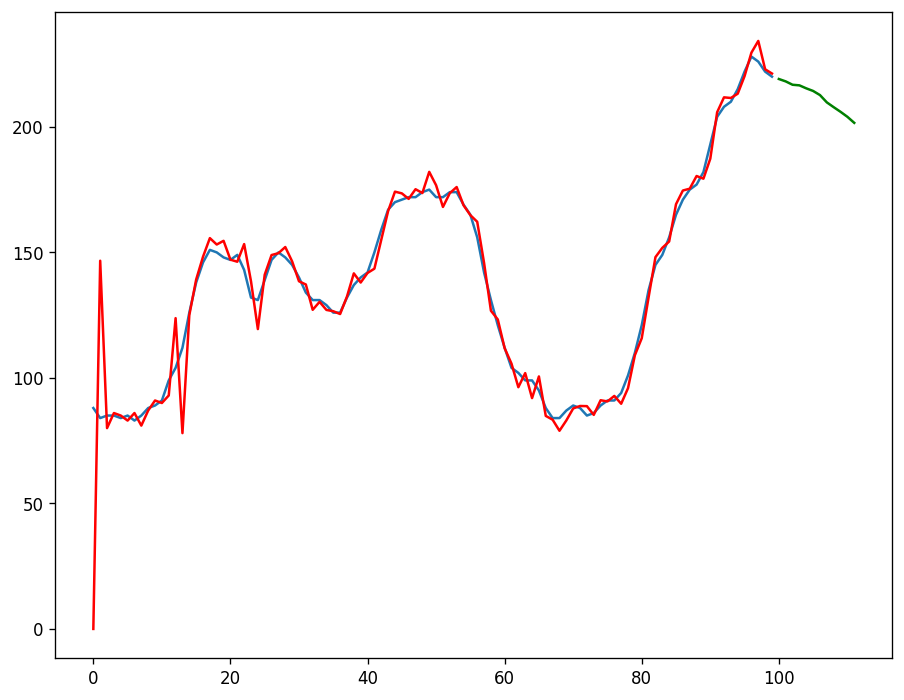

In [28]:
plt.plot(y)
plt.plot(model.predict_in_sample(), color='red')
plt.plot(forecast, color='green')
plt.show()

The above code will display a plot of the original time sereis, the fitted values, and the forecasts. 

## Conclusion 

In this notebook, we learned dhow to implement ARIMA model in Python using the pmdarima library. We loaded the data, chedk the stationalriyt of the data, fittd athe ARIMA model, generated thee forcasts, and plotted the results. ARIMA model is a powerful tool for time series forecasting and can be used in various fields ot prdict futyure values of a time sereis. 


# Model Evaluation 

There are several ways to evaluate the performance of an ARIMA model. Here are some common methods:

1. Mean Absolute Error (MAE): This measures the average absolute difference between the actual and predicted values. A lower MAE indicates better performance.

2. Mean Squared Error (MSE): This measures the average squared difference between the actual and predicted values. A lower MSE indicates better performance.

3. Root Mean Squared Error (RMSE): This measures the square root of the average squared difference between the actual and predicted values. A lower RMSE indicates better performance.

4. Mean Absolute Percentage Error (MAPE): This measures the average percentage difference between the actual and predicted values. A lower MAPE indicates better performance.

5. Symmetric Mean Absolute Percentage Error (SMAPE): This measures the average percentage difference between the actual and predicted values, but it is symmetric around zero. A lower SMAPE indicates better performance.

You can use these metrics to evaluate the performance of your ARIMA model. You can calculate these metrics using the actual and predicted values of the time series. Here's an example code to calculate these metrics:


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 

# calculate the mean absolute error (MAE)
mae = mean_absolute_error(y, model.predict_in_sample())
print('MAE:', mae)

# Calculate the mean squared error(MSE). 
mse = mean_squared_error(y, model.predict_in_sample())
print('MSE',mse)

# Calculate theroot mean squared error(RMSE)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

# Calculate the mean absolute precetager error (MAPE)
mape = np.mean(np.abs((y - model.predict_in_sample())/y))*100
print('MAPE:', mape)


# Calcualte the symmetric mean absolute percentage error (SMAPE) 
smape = np.mean(2.0*np.abs(model.predict_in_sample()-y)/(np.abs(y) + np.abs(model.predict_in_sample())))*100
print('SMAPE', smape)

MAE: 4.822137373251549
MSE 145.1767233567735
RMSE: 12.048930382269353
MAPE: 4.406139862474435
SMAPE 5.248885658302182


There are several ways to evaluate the performance of an ARIMA model. Here are some common methods:

1. Mean Absolute Error (MAE): This measures the average absolute difference between the actual and predicted values. A lower MAE indicates better performance.

2. Mean Squared Error (MSE): This measures the average squared difference between the actual and predicted values. A lower MSE indicates better performance.

3. Root Mean Squared Error (RMSE): This measures the square root of the average squared difference between the actual and predicted values. A lower RMSE indicates better performance.

4. Mean Absolute Percentage Error (MAPE): This measures the average percentage difference between the actual and predicted values. A lower MAPE indicates better performance.

5. Symmetric Mean Absolute Percentage Error (SMAPE): This measures the average percentage difference between the actual and predicted values, but it is symmetric around zero. A lower SMAPE indicates better performance.

You can use these metrics to evaluate the performance of your ARIMA model. You can calculate these metrics using the actual and predicted values of the time series. Here's an example code to calculate these metrics:



This code calculates the MAE, MSE, RMSE, MAPE, and SMAPE metrics for the ARIMA model. You can use these metrics to compare the performance of different ARIMA models or to evaluate the performance of your model over time.

# ARIMA vs SARIMA


ARIMA (Autoregressive Integrated Moving Average) and SARIMA (Seasonal Autoregressive Integrated Moving Average) models are both time series models that are used to forecast future values of a time series based on its past values. The main difference between the two models is that SARIMA models are designed to handle time series data with seasonal patterns, while ARIMA models are designed for non-seasonal time series data.

ARIMA models are based on three parameters: p, d, and q. The p parameter represents the number of autoregressive terms, the d parameter represents the number of differences needed to make the time series stationary, and the q parameter represents the number of moving average terms. ARIMA models are used to model non-seasonal time series data.

SARIMA models are based on six parameters: p, d, q, P, D, and Q. The additional three parameters (P, D, and Q) represent the seasonal autoregressive, seasonal difference, and seasonal moving average terms, respectively. SARIMA models are used to model time series data with seasonal patterns.

In summary, ARIMA models are used for non-seasonal time series data, while SARIMA models are used for time series data with seasonal patterns. SARIMA models are an extension of ARIMA models that include additional parameters to handle seasonal patterns in the data.


## Introduction to SARIMA

SARIMA (Seasonal Autoregressive Integrated Moving Average) is a time series model that is used to forecast future values of a time series based on its past values. SARIMA is an extension of ARIMA (Autoregressive Integrated Moving Average) that includes additional parameters to handle seasonal patterns in the data.

SARIMA models are based on six parameters: p, d, q, P, D, and Q. The p parameter represents the number of autoregressive terms, the d parameter represents the number of differences needed to make the time series stationary, and the q parameter represents the number of moving average terms. The additional three parameters (P, D, and Q) represent the seasonal autoregressive, seasonal difference, and seasonal moving average terms, respectively.

## How SARIMA works

SARIMA works by modeling the time series data as a combination of autoregressive, moving average, and seasonal components. The autoregressive component models the relationship between the current value of the time series and its past values. The moving average component models the relationship between the current value of the time series and its past errors. The seasonal component models the relationship between the current value of the time series and its past seasonal values.

SARIMA models are typically fitted to the time series data using the maximum likelihood estimation method. The fitted model can then be used to make predictions on new data.

## Implementing SARIMA in Python

SARIMA can be implemented in Python using the `statsmodels` library. Here's an example code that demonstrates how to implement SARIMA in Python:



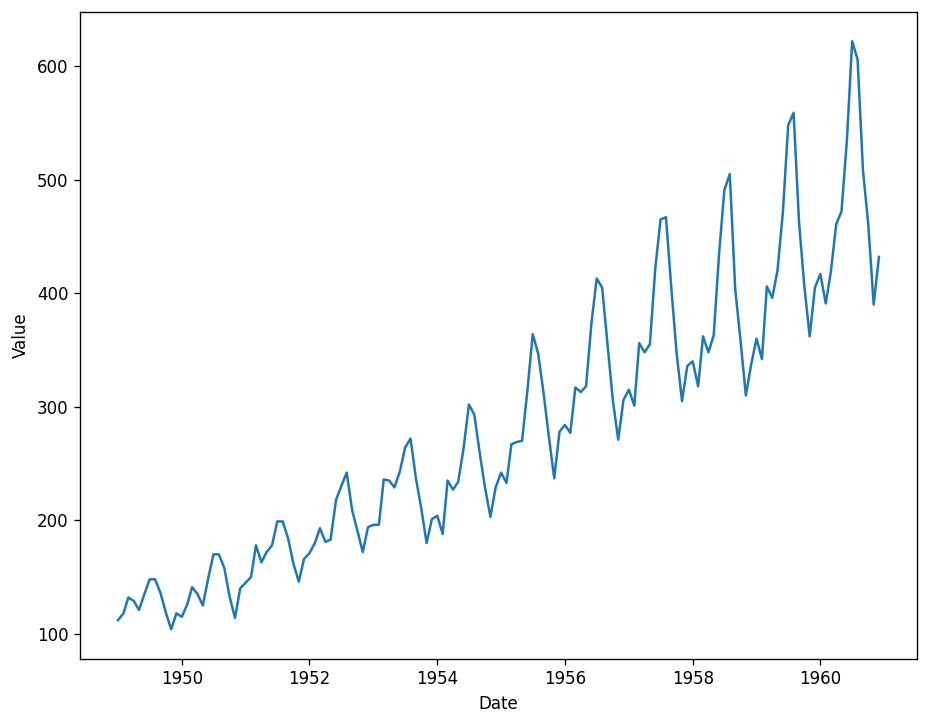

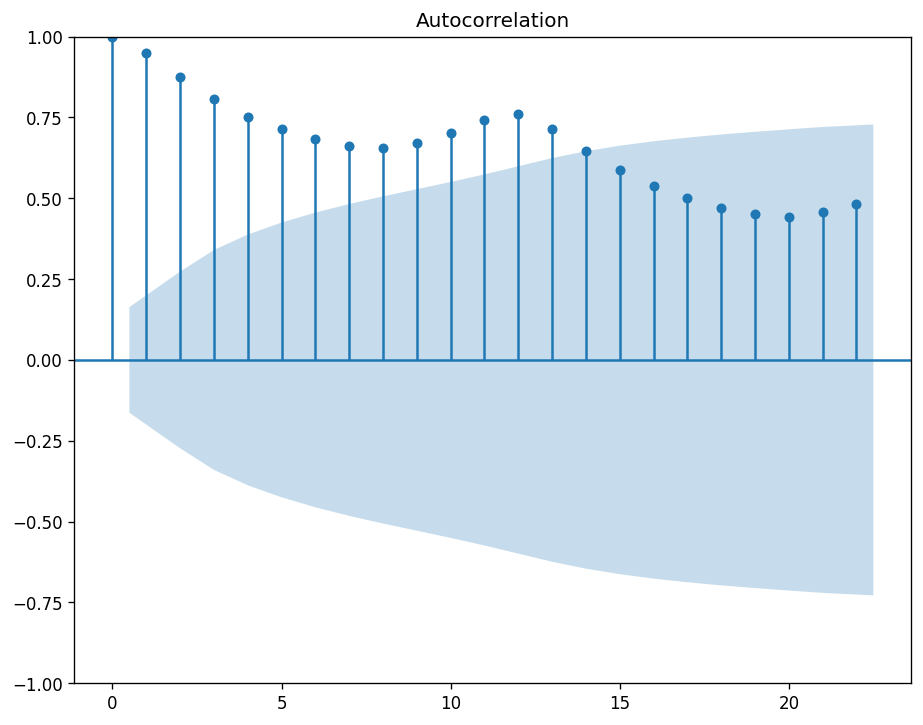

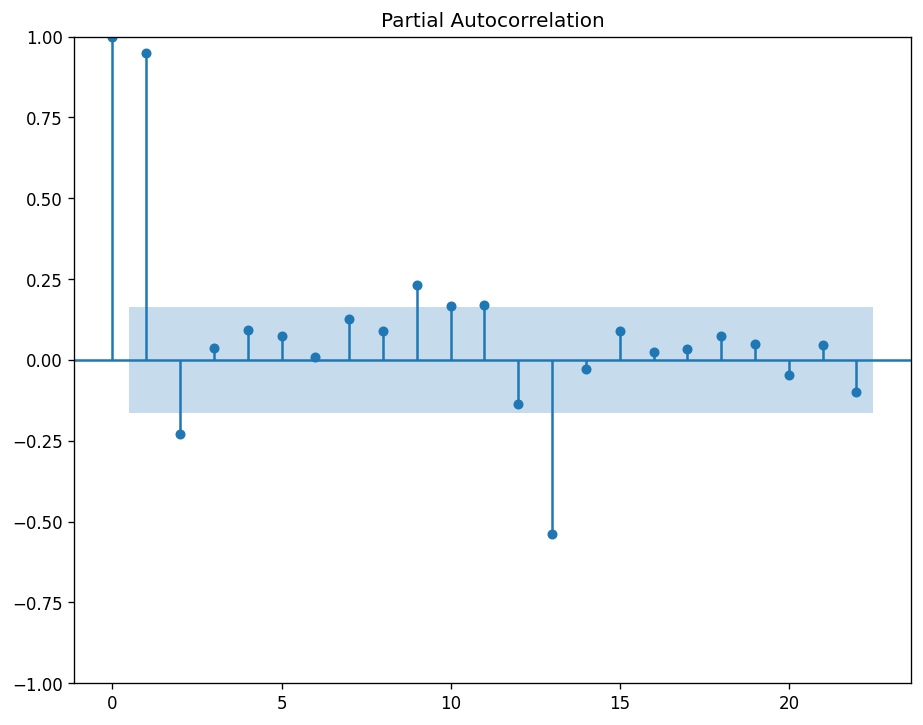

c:\Users\Saurabh Kumar\miniconda3\envs\tf_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Saurabh Kumar\miniconda3\envs\tf_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Mon, 26 Feb 2024   AIC                           1022.299
Time:                                    15:38:31   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.357      0.721      -0.825       0.570
ma.L1         -0.2149      0.325   

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the time series data
df = pd.read_csv('../Data/AirPassengers.csv', index_col='Month', parse_dates=True)

# Plot the time series data
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Plot the autocorrelation and partial autocorrelation functions
plot_acf(df)
plot_pacf(df)
plt.show()

# Define the SARIMA model parameters
p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1
m = 12

# Fit the SARIMA model to the data
model = SARIMAX(df, order=(p, d, q), seasonal_order=(P, D, Q, m))
results = model.fit()

# Print the model summary
print(results.summary())

# Make predictions on new data
forecast = results.forecast(steps=12)
print(forecast)



In this code, we first load the time series data from a CSV file and plot it. We then plot the autocorrelation and partial autocorrelation functions to determine the values of the p, d, and q parameters.

We then define the SARIMA model parameters and fit the model to the data using the `SARIMAX` class. We print the model summary to see the values of the estimated parameters. Finally, we make predictions on new data using the `forecast` method.

## Conclusion

SARIMA is a powerful time series model that can be used to forecast future values of a time series based on its past values. SARIMA models are an extension of ARIMA models that include additional parameters to handle seasonal patterns in the data. SARIMA can be implemented in Python using the `statsmodels` library.